In [9]:
import spacy
nlp = spacy.load('en_core_web_sm')
import re #library for regular expressions
import pandas as pd
from collections import Counter
from string import punctuation 
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path 

df = pd.read_csv ('../dataframe/df_complete.csv')


### Text cleaning 


In [10]:
# Creation of a new text column called text1 with the first pre-processing step: lower case
df['text1'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['text1'].head()

0    adare farm supporting #adare in #limerickgoing...
1    adare manor team and @adaretidytowns ready for...
2    en plein air, adare. third placed submission b...
3    adare manor coming on every time i'm here ..wi...
4    this creep keeps following me around... #adare...
Name: text1, dtype: object

In [11]:
# Remove hyperlinks
df['text1'] = [re.sub(r'https?:\/\/.\S+', "", x) for x in df['text1']]

# Remove websites and email address
df['text1'] = [re.sub(r"\S+com", "", x) for x in df['text1']]
df['text1'] = [re.sub(r"\S+@\S+", "", x) for x in df['text1']]

# Remove old style retweet text "RT"
df['text1'] = [re.sub(r'^rt[\s]+', '', x) for x in df['text1']]


In [12]:
# Expanding Contractions
# dictionary consisting of the contraction and the actual value
#Questo forse si puo' togliere perchè le contrazioni poi vanno via eliminando le stopwords (vedi dopo)
apos_dict = {"'s":" is","n't":" not","'m":" am","'ll":" will",
           "'d":" would","'ve":" have","'re":" are"}
# replace the contractions
for key,value in apos_dict.items():
    if key in df['text1']:
        df['text1'] = df['text1'].replace(key,value)

# Remove punctuations (anche hashtag, @)
df['text1'] =[re.sub("[\W_]", ' ', x) for x in df['text1']]
df['text1']

# Remove numbers
df['text1'] =[re.sub("\d+", "", x) for x in df['text1']]

In [13]:
### Stopwords
# The next step is to remove the useless words, namely, the stopwords. Stopwords are words that frequently appear in many articles,
# but without significant meanings. Examples of stopwords are ‘I’, ‘the’, ‘a’, ‘of’.
# spacy stopwords
stopwords = nlp.Defaults.stop_words
print(len(stopwords)) # 326
print(stopwords)

# exclude the stopwords from the text
df['text1'] = df['text1'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

326
{'do', 'along', 'nowhere', 'for', "'re", 'few', 'was', 'however', 'another', 'this', 'two', 'name', 'whatever', 'whenever', 'ca', 'next', 'via', 'side', 'see', "'ll", 'become', 'third', 'latter', 'done', 'whose', 'nine', 'anyone', 'never', 'now', 'enough', 'then', 'forty', 'themselves', 'on', 'nothing', 'serious', 'n‘t', 'thereupon', 'myself', 'own', 'give', 'himself', 'put', 'below', 'seemed', 'around', 'hers', 'whom', 'after', 'five', 'everyone', 'whoever', 'namely', 'together', 'why', 'mostly', 'indeed', 'has', 'else', 'not', 'out', '‘s', 'n’t', 'my', 'of', 'because', 'without', '‘ve', 'more', 'but', '’ll', 'beforehand', 'somehow', 'a', 'becomes', 'former', 'most', 'noone', '’s', 'our', 'sixty', 'amount', 'every', 'under', 'in', 'would', 'yourselves', 'yours', 'could', 'made', 'him', 'or', 'make', 'hundred', 'sometime', 'will', 'before', 'if', 'who', 'other', 'keep', 'three', 'unless', 'toward', "'s", 'against', 'anyhow', 'further', 'fifty', 'yourself', 'twenty', "'d", 'througho

In [15]:
### Lemmatization
#Another way of converting words to its original form is called stemming.
#Lemmatization is taking a word into its original lemma, and stemming is taking the linguistic root of a word.

# .lemma_ function from spacy 
def space(tweet):
    doc = nlp(tweet)
    return " ".join([token.lemma_ for token in doc])
df['text1'] = df['text1'].apply(space)

In [21]:
## Check which are the most common words
# token dividen
token_ = [i.split() for i in df["text1"]]
df['token'] = [i.split() for i in df["text1"]]
# token joined in one list 
#remove words with lenght < 3 and puntctuations !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
tokens = [item for sublist in token_ for item in sublist if len(item) > 3 and item not in punctuation]

word_counter = Counter(tokens)


In [8]:
word_counter

Counter({'adare': 568,
         'farm': 40,
         'support': 303,
         'limerickgoingforgold': 13,
         'gold': 50,
         'line': 104,
         'open': 513,
         'noon': 61,
         'wednesday': 83,
         'manor': 33,
         'team': 347,
         'adaretidytown': 25,
         'ready': 133,
         'year': 540,
         'limerick': 29280,
         'clean': 69,
         'plein': 3,
         'place': 656,
         'submission': 12,
         'tralee': 27,
         'base': 44,
         'jane': 5,
         'hilliard': 1,
         'paint': 32,
         'vantage': 1,
         'point': 169,
         'bandstand': 17,
         'village': 105,
         'park': 13324,
         'irishart': 9,
         'landscape': 67,
         'come': 589,
         'time': 653,
         'course': 68,
         'creep': 1,
         'keep': 90,
         'follow': 215,
         'roadtrip': 9,
         'summerofdream': 1,
         'hotel': 358,
         'serendipityshoe': 1,
         'vote': 122,

In [11]:
df_counter = pd.DataFrame.from_dict(word_counter, orient='index').reset_index()
df_counter.to_csv('../dataframe/df_counter.csv') 

In [ ]:
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))

for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

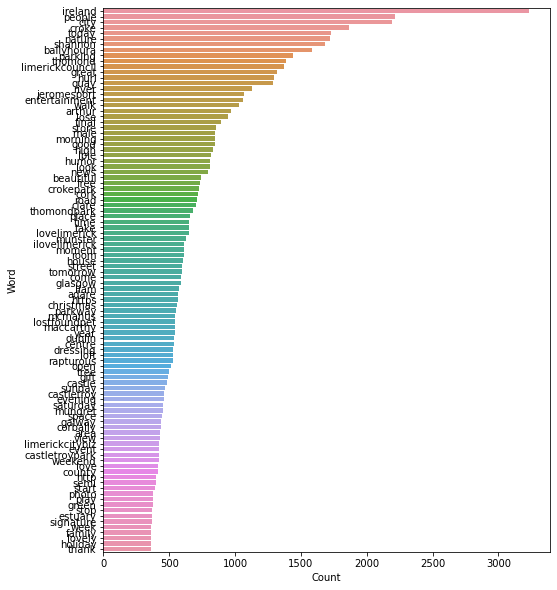

In [13]:
# Create a data frame of the most common words 
lst = word_counter.most_common(n_print)
df_most_common = pd.DataFrame(lst, columns = ['Word', 'Count'])

# Draw a bar chart dropping limerick 
plt.figure(figsize=(8,10))
sns.barplot(y= 'Word', x = 'Count', data = df_most_common.drop([0,1]))
plt.show()

In [14]:
df_most_common.head()

,Word,Count
0,limerick,29280
1,park,13324
2,ireland,3229
3,people,2217
4,city,2191


#### Save cleaned df and most common word dataframe


In [ ]:
df.to_csv('../dataframe/df_completec.csv') 
df_most_common.to_csv('most_common.csv') 